In [3241]:
import numpy as np
import pandas as pd

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Colors are at https://developer.mozilla.org/en-US/docs/Web/CSS/color_value

## 2021 Kaggle Machine Learning & Data Science Survey

### Objective

##### Dataset:  
Industry-wide survey of the state of data science and machine learning with **25,973** responses!


##### Objective:
**Tell a data story** about a subset of the data science community represented in this survey, through a combination of both **narrative text** and **data exploration**. A “story” could be defined any number of ways, and that’s deliberate. The challenge is to deeply explore (through data) the impact, priorities, or concerns of a specific group of data science and machine learning practitioners. That group can be defined in the macro (for example: anyone who does most of their coding in Python) or the micro (for example: female data science students studying machine learning in masters programs). This is an opportunity to be creative and tell the story of a community you identify with or are passionate about!
- **Composition** - Is there a clear narrative thread to the story that’s articulated and supported by data? The subject should be well defined, well researched, and well supported through the use of data and visualizations.
- **Originality** - Does the reader learn something new through this submission? Or is the reader challenged to think about something in a new way? A great entry will be informative, thought provoking, and fresh all at the same time.
- **Documentation** - Are your code, and notebook, and additional data sources well documented so a reader can understand what you did? Are your sources clearly cited? A high quality analysis should be concise and clear at each step so the rationale is easy to follow and the process is reproducible

##### My Take
Women > 40 years

### Prologue
I am a **45+ years woman** in technology space for over 2 decades and in data science space for nearly 3 years! I am curious...curious to know how the my category of practitioners are faring in the ML and DS field! 

#### Functions

In [3242]:
df_result = pd.DataFrame()

In [3243]:
def percent(val, total):
    return round(100 * val/total, 2)

In [3244]:
def convert2percent(df, col, total_col):
    df[col] = df[col]/ df[total_col]
    return df[col].apply(lambda x: round(x*100,2))

def createNewCol(df_old, oldCol, df_new, newCol, value):
    df_new[newCol] = df_old[oldCol]
    # strip the value of the leading and trailing empty spaces
    df_new.loc[~df_new[newCol].isnull(), newCol] = df_new[~df_new[newCol].isnull()][newCol].apply(lambda x: x.strip())
    return  df_new[newCol].apply(lambda x: 1 if x== value else 0)

def compare(df, df_overall, df_specific, cat_other, col_other):
    # Create a df with the overall IDE users as percentage
    df_all = pd.DataFrame()
    df_all.loc['Count','Overall']=df.shape[0]
    df_all = pd.concat([df_all, df_specific])
    df_all.loc[cat_other,'Overall']=df_all.loc[cat_other,'Overall']/len(col_other)
    df_all['Overall'] = df_all['Overall'].apply(lambda x: round((x/df.shape[0])*100,2))
    #df_pl_all

    # Create different df for woman < 40 and woman > 40
    df_woman_lt40 = df_overall.loc[('<40', 'Woman'),:].to_frame()#; print("df_pl_woman_lt40\n", df_pl_woman_lt40);print()
    df_woman_gt40 = df_overall.loc[('>40', 'Woman'),:].to_frame()#; print("df_pl_woman_gt40\n", df_pl_woman_gt40)

    # Concatenate the overall and the woman < 40 and woman > 40 data 
    df_temp = pd.concat([df_all, df_woman_lt40, df_woman_gt40], axis=1, join='inner')
    print(df_temp)
    ax = df_temp.plot.bar( ylim=(0,100),figsize=(15, 6));annotate(ax, "Overall")
    return df_temp

# Create a df with users wrt Age-group and Gender 
def createSpecificAndSummary(df,topcol1, topcol2, topcol3, othercol, nonecol, othercols):
    df_temp = df.agg({topcol1:np.sum,topcol2:np.sum,topcol3:np.sum, othercol:np.sum, nonecol:np.sum}).to_frame()
    df_temp.rename(columns={0:"Overall"}, inplace=True)
    print(df_temp)

    df_summary = df.groupby(by=['AgeGroup','Gender']).agg({'AgeGroup':'count',topcol1:np.sum,topcol2:np.sum,topcol3:np.sum, othercol:np.sum, nonecol:np.sum})
    df_summary.rename(columns={"AgeGroup":"Count"}, inplace=True)

    df_summary[topcol1] = convert2percent(df_summary,topcol1,"Count")
    df_summary[topcol2] = convert2percent(df_summary,topcol2,"Count")
    df_summary[topcol3] = convert2percent(df_summary,topcol3,"Count")

    df_summary[othercol]  = df_summary[othercol]/ df_summary["Count"]
    df_summary[othercol]  = df_summary[othercol].apply(lambda x: round(x*100/len(othercols),2))

    df_summary[nonecol]   = convert2percent(df_summary,nonecol,"Count")
    df_summary['Count']   = df_summary['Count'].apply(lambda x: round((x/df.shape[0])*100,2))
    return df_temp, df_summary

def summarise(df, df_new, cat, cols, cols_other, 
                        top1col1, top1col2, top1val, 
                        top2col1, top2col2, top2val, 
                        top3col1, top3col2, top3val, nonecol1  ):

    COL_COUNT = f'{cat}-Count'
    COL_OTHER = f'{cat}-Other'
    COL_NONE  = f'{cat}-None'

    df_new[COL_COUNT]  = df[cols].count(axis=1)
    df_new[top1col2]   = createNewCol(df, top1col1 , df_new, top1col2, top1val)
    df_new[top2col2]   = createNewCol(df, top2col1 , df_new, top2col2, top2val)
    df_new[top3col2]   = createNewCol(df, top3col1 , df_new, top3col2, top3val)

    df_new[COL_NONE]   = createNewCol(df, nonecol1, df_new, COL_NONE, "None")

    df_new[COL_OTHER]  = df[cols_other].count(axis=1) 
    df_new[COL_COUNT]  = df[cols].count(axis=1) # None is not considered

    # Fill None for rows where no option was selected
    print("BEFORE", df_new[(df_new[COL_COUNT]==0)][COL_COUNT].sum(), df_new[COL_NONE].sum())
    df_new.loc[(df_new[COL_COUNT]==0) & (df_new[COL_NONE]==0), COL_NONE] = 1
    print("AFTER", df_new[COL_NONE].sum())

    print(df_new.head())

    df_result.loc[cat,'Count-Median'] = df_new[COL_COUNT].median()
    df_result.loc[cat,'W<40-Median'] =df_new[(df_new['Gender']=='Woman')&(df_new['AgeGroup']=='<40')][COL_COUNT].median()
    df_result.loc[cat,'W>40-Median'] =df_new[(df_new['Gender']=='Woman')&(df_new['AgeGroup']=='>40')][COL_COUNT].median()

    df_result.loc[cat,'Count-Max'] = df_new[COL_COUNT].max()
    df_result.loc[cat,'W<40-Max'] =df_new[(df_new['Gender']=='Woman')&(df_new['AgeGroup']=='<40')][COL_COUNT].max()
    df_result.loc[cat,'W>40-Max'] =df_new[(df_new['Gender']=='Woman')&(df_new['AgeGroup']=='>40')][COL_COUNT].max()

    # Create a df with the IDE and total number of IDE users
    df_temp, df_summary = createSpecificAndSummary(df_new, top1col2, top2col2, top3col2, COL_OTHER, COL_NONE, cols_other)

    df_ = compare(df, df_summary, df_temp, COL_OTHER, cols_other)
    plotBox(df_new, COL_COUNT)  
    return df_    

##### Visulisations

In [3245]:
def plotBox(df, col):
    df_man = df[df['Gender']=='Man'][['AgeGroup', col]];print(df_man.head())
    df_woman = df[df['Gender']=='Woman'][['AgeGroup', col]];print(df_woman.head())
    plt.figure(figsize=(18, 5), dpi=80)

    ax = plt.subplot(1, 4, 1); df_woman[df_woman['AgeGroup']=='<40'].hist(ax=ax); plt.title('Woman < 40')
    ax = plt.subplot(1, 4, 2); df_woman[df_woman['AgeGroup']=='>40'].hist(ax=ax); plt.title('Woman > 40') 
    ax = plt.subplot(1, 4, 3); df_man.boxplot(by='AgeGroup', ax=ax); ax.set_title('Man')        
    ax = plt.subplot(1, 4, 4); df_woman.boxplot(by='AgeGroup',ax=ax); ax.set_title('Woman') 

def plotSankey(nodes, links, title, width, height):
    data = go.Sankey(node = nodes, link = links)
    fig = go.Figure(data)
    fig.update_layout(title=title,  font_size=16, width=width,height=height,)
    fig.show()

def showTreeMap(df, tree, values, title):
    fig = px.treemap(df, path=[px.Constant("all")] + tree, values=values,     
                    color_discrete_map={'(?)':'lightgrey', 'Lunch':'gold', 'Dinner':'darkblue'})
    fig.update_traces(root_color="lightgrey")
    #fig.update_traces(hovertemplate=)
    fig.update_layout(title=title,  margin = dict(t=50, l=25, r=25, b=25))
    fig.show()

def annotate(ax, title='', strformat='', divideby=1):
    # Annotate
    for p in ax.patches:
        # format(, '.1f')
        value = p.get_height()/divideby
        ax.annotate(f"{value:.1f}{strformat}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    ax.set_title(title)

#### Read dataset

In [3246]:
df = pd.read_csv('data/kaggle_survey_2021_responses.csv', header=[0,1])

/Users/sreedevigattu/sree/projects/mlds/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning:

Columns (195,201) have mixed types.Specify dtype option on import or set low_memory=False.



In [3247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 0 to 25972
Columns: 369 entries, ('Time from Start to Finish (seconds)', 'Duration (in seconds)') to ('Q38_B_OTHER', 'In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other')
dtypes: float64(8), int64(1), object(360)
memory usage: 73.1+ MB


In [3305]:
print(df.columns.tolist()[0:10])

[('Time from Start to Finish (seconds)', 'Duration (in seconds)'), ('Q1', 'What is your age (# years)?'), ('Q2', 'What is your gender? - Selected Choice'), ('Q3', 'In which country do you currently reside?'), ('Q4', 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'), ('Q5', 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice'), ('Q6', 'For how many years have you been writing code and/or programming?'), ('Q7_Part_1', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python'), ('Q7_Part_2', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R'), ('Q7_Part_3', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL')]


In [3249]:
df.iloc[0,:].to_frame().to_csv("Columns.csv")

<AxesSubplot:>

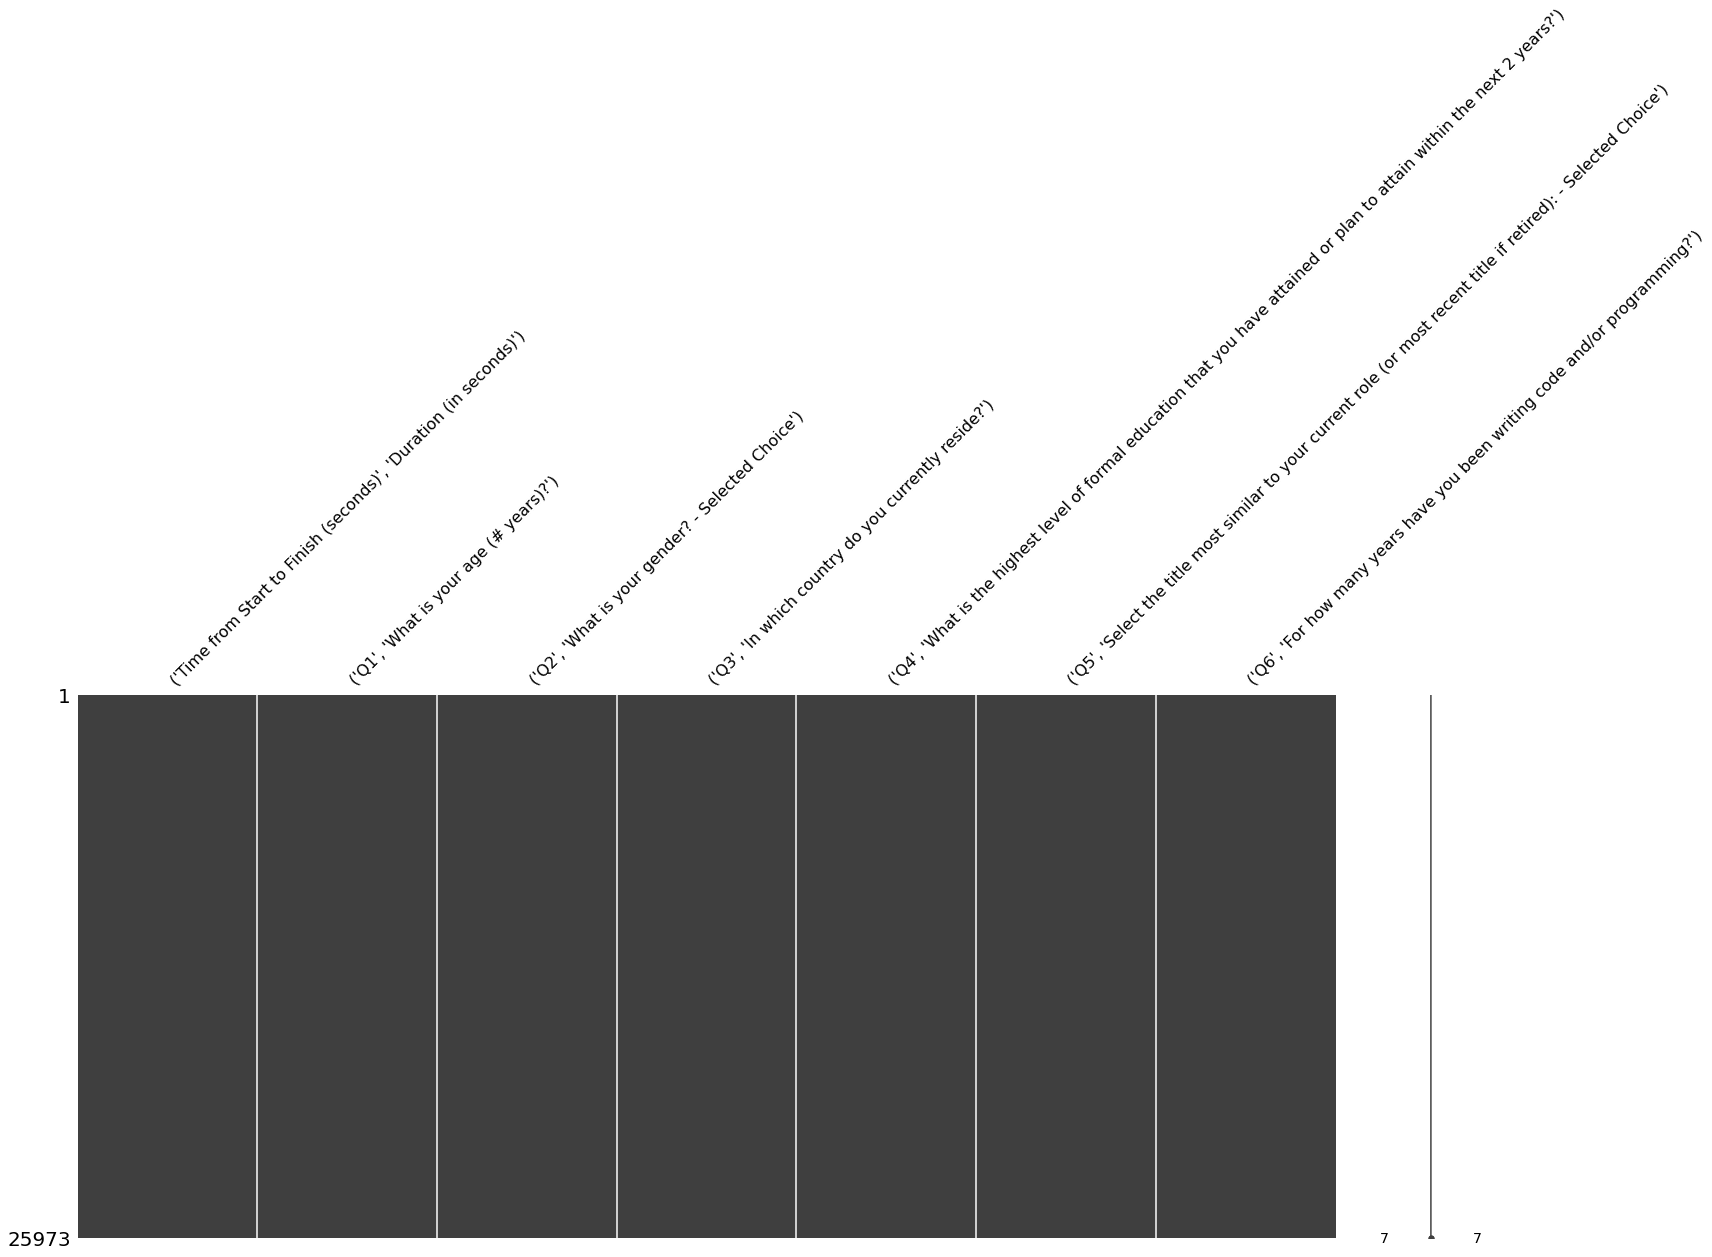

In [3250]:
msno.matrix(df.iloc[:,:7])

#### Age and Gender - Data processing

In [3251]:
df_new = pd.DataFrame()
df_new['Age']       = df['Q1', 'What is your age (# years)?']
df_new['Gender']    = df['Q2', 'What is your gender? - Selected Choice']
df_new['Country']   = df['Q3', 'In which country do you currently reside?']
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 0 to 25972
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Age      25973 non-null  object
 1   Gender   25973 non-null  object
 2   Country  25973 non-null  object
dtypes: object(3)
memory usage: 608.9+ KB


In [3252]:
df_new.groupby(by='Age').agg({"Age":'count'}).rename(columns={'Age':'Count'}).reset_index(inplace=True)
print(df_new['Gender'].value_counts())
print(df_new.head())

Man                        20598
Woman                       4890
Prefer not to say            355
Nonbinary                     88
Prefer to self-describe       42
Name: Gender, dtype: int64
     Age Gender    Country
0  50-54    Man      India
1  50-54    Man  Indonesia
2  22-24    Man   Pakistan
3  45-49    Man     Mexico
4  45-49    Man      India


In [3253]:
df_new['Gender'] = df_new['Gender'].apply(lambda x: x if x in ['Man', 'Woman'] else 'Other')
df_new["AgeGroup"] = df_new['Age'].apply(lambda x: '<40' if x in ['18-21', '22-24', '25-29', '30-34', '35-39'] else '>40')
df_new.head()

,Age,Gender,Country,AgeGroup
0,50-54,Man,India,>40
1,50-54,Man,Indonesia,>40
2,22-24,Man,Pakistan,<40
3,45-49,Man,Mexico,>40
4,45-49,Man,India,>40


In [3254]:
COLS_GENDER = ['Man', 'Woman', 'Other']
COLS_AGE = ['18-29','30-39','40-49','50-59','60-69','70+']
COLOR_MAP_GENDER = {'(?)':'lightgrey', 'Man':'dodgerblue', 'Woman':'lightcoral', 'Other':'gold'}

def getAgeGenderPivotDF():
    COLS_18_29, COLS_30_39, COLS_40_49, COLS_50_59 = ['18-21', '22-24', '25-29'], ['30-34','35-39'], ['40-44','45-49'], ['50-54','55-59']

    df_ = df_new.groupby(by=['Age','Gender']).agg({'Gender':'count'}).rename(columns={'Gender':'Count'})
    df_.reset_index(inplace=True)
    #print(df_.head())

    df_summary = pd.pivot_table(data = df_,  values='Count', index=['Age'], columns=['Gender'], aggfunc=np.sum, fill_value=0)
    df_summary = df_summary[COLS_GENDER]

    #print(df_summary)
    df_summary.loc['18-29',COLS_GENDER ] = df_summary.loc[COLS_18_29, COLS_GENDER].sum(); df_summary.drop(index=COLS_18_29, inplace=True)
    df_summary.loc['30-39',COLS_GENDER ] = df_summary.loc[COLS_30_39, COLS_GENDER].sum(); df_summary.drop(index=COLS_30_39, inplace=True)
    df_summary.loc['40-49',COLS_GENDER ] = df_summary.loc[COLS_40_49, COLS_GENDER].sum(); df_summary.drop(index=COLS_40_49, inplace=True)
    df_summary.loc['50-59',COLS_GENDER ] = df_summary.loc[COLS_50_59, COLS_GENDER].sum(); df_summary.drop(index=COLS_50_59, inplace=True)
    df_summary = df_summary.reindex(index = COLS_AGE)
    df_summary['Count'] = df_summary['Man'] + df_summary['Woman'] + df_summary['Other']
    df_summary.reset_index(inplace=True)
    df_summary["AgeGroup"] = df_summary['Age'].apply(lambda x: '<40' if x in ['18-29','30-39'] else '>40')
    print(df_summary)
    return df_summary

def plotAgeGenderSankey(df):
    LABELS  = [ f'[{age}]yrs-{gender}' for age in COLS_AGE for gender in COLS_GENDER  ]#; print(LABELS[0:3])
    VALUES  = [ int(df[df['Age']==age][col].values[0]) for age in COLS_AGE for col in COLS_GENDER ]#;print(VALUES)
    NODES   = dict( label = [f'{col} yrs' for col in COLS_AGE] + COLS_GENDER, hovertemplate=" ",
                    color = [ "seagreen",   "lightseagreen",   "tomato",  "orange",  "peru",    "brown"] + ['dodgerblue', 'lightcoral', 'gold'],
                    x     = [ 0.1]*6 + [1]*6,
                    y     = [ 0.15, 0.5, 0.7, 0.8, 0.9, .95,] + [0.3, 0.75, 0.9])
    LINKS   = dict( source = [0]*3 + [1]*3 + [2]*3 + [3]*3 + [4]*3 + [5]*3 + [6]*3, target = [ 6, 7, 8]*6, 
                    value =  VALUES, label = LABELS, hovertemplate="%{label}",     
                    color =  ["lightgreen"]*3 + ["paleturquoise"]*3 +["sandybrown"]*3 + ['khaki'] * 3 + ['moccasin']*3 + ['bisque']*3)        
    plotSankey(NODES, LINKS, "Age & Gender", 1000, 600)
    # Colors are at https://developer.mozilla.org/en-US/docs/Web/CSS/color_value

def getAgeGenderDF():
    df_ = df_new.groupby(by=['Age','Gender','AgeGroup']).agg({'Gender':'count'}).rename(columns={'Gender':'Count'})
    df_.reset_index(inplace=True)
    total = df_['Count'].sum()
    df_["Count"] = df_['Count'].apply(lambda x: percent(x, total))
    print(df_.head())
    return df_

In [3255]:
def showTreeMap(df, tree, values, title, width, height):
    fig = px.treemap(df, path=[px.Constant("all")] + tree, values=values,  
                    color='Gender', color_discrete_map={'(?)':'lightgrey', 'Man':'dodgerblue', 'Woman':'lightcoral', 'Other':'gold'})
    fig.update_traces(root_color="lightgrey")
    #fig.update_traces(values=values, hovertemplate='{values}')
    fig.update_layout(title=title,  width=width, height=height, margin = dict(t=50, l=25, r=25, b=25))
    fig.show()

def plotTreeMapSP(df, tree, values, color, colors, fig, row, col):
    subfig = px.treemap(df, path=[px.Constant("all")] + tree, values=values, color=color, color_discrete_map=colors)
    print(type(subfig.data[0]))
    subfig.update_traces(root_color="lightgrey")
    #subfig.update_traces(values=df[values], hovertemplate='{values}')
    subfig.update_layout(width=600, height=400, margin = dict(t=50, l=25, r=25, b=25))
    fig.add_trace(subfig.data[0], row=row, col=col)
    return fig

def plotLineSP(df, x, y, color, colormap, fig, row, col, w, h):
    subfig = px.line(df, x=x, y=y, color=color, color_discrete_map=colormap)
    subfig.update_traces(mode="markers+lines", hovertemplate=None)
    #subfig.update_layout(width=w, height=h, margin = dict(t=50, l=25, r=25, b=25))
    for data in subfig.data:
        fig.add_trace(data, row=row, col=col)
    return fig

def plotLine(df, x, y, color, colormap, title):#, fig, row, col, w, h):
    fig = px.line(df, x=x, y=y, color=color, color_discrete_map=colormap)
    fig.update_traces(mode="markers+lines", hovertemplate=None)
    fig.update_layout(title=title, width=600, height=400, margin = dict(t=50, l=25, r=25, b=25))
    fig.show()
    return fig

def plotTreeMapLine(df):
    print(df.groupby(by=['AgeGroup','Gender']).agg({'Count':np.sum}))
    fig = make_subplots( cols = 2, rows = 1, column_widths = [0.4, 0.4],
                        subplot_titles = ('<b>Age & Gender<br />&nbsp;<br />', '<b>Members with Age<br />&nbsp;<br />'),
                        specs = [[{'type': 'treemap', 'rowspan': 1}, {'type': 'Scatter'}]])
    fig = plotTreeMapSP(df, ['Age', 'Gender'], 'Count', "Gender", COLOR_MAP_GENDER, fig, 1, 1)
    fig = plotLineSP(df, 'Age', 'Count', 'Gender', COLOR_MAP_GENDER, fig, 1, 2, 600, 300 )
    fig.show()

### Age and Gender
Let's see what is the age-gender wise distribution. How many men and women are distributed across age groups?

In [3256]:
df_ = getAgeGenderPivotDF()
plotAgeGenderSankey(df_)

df_ = getAgeGenderDF()
plotTreeMapLine(df_)

showTreeMap(df_, ['AgeGroup', 'Gender'], 'Count',"Gender - Age Groups", 1000, 500)

Gender    Age      Man   Woman  Other    Count AgeGroup
0       18-29  11198.0  3074.0  254.0  14526.0      <40
1       30-39   4758.0  1073.0  114.0   5945.0      <40
2       40-49   2708.0   492.0   65.0   3265.0      >40
3       50-59   1320.0   208.0   28.0   1556.0      >40
4       60-69    504.0    35.0   14.0    553.0      >40
5         70+    110.0     8.0   10.0    128.0      >40


     Age Gender AgeGroup  Count
0  18-21    Man      <40  14.23
1  18-21  Other      <40   0.34
2  18-21  Woman      <40   4.30
3  22-24    Man      <40  14.03
4  22-24  Other      <40   0.34
                 Count
AgeGroup Gender       
<40      Man     61.44
         Other    1.42
         Woman   15.97
>40      Man     17.87
         Other    0.45
         Woman    2.85
<class 'plotly.graph_objs._treemap.Treemap'>


As we can see in each age group, the number of women is far lesser than that of men. And with age, the number of members (and women) is decreasing. 

*Note: The Other gender is lesser than Man & Woman but since Other community is ot the focus, ignoring it*

A person who is 40+ years now in 2021 was born in 1970s, graduated in 1990s. This is in sync with women not taking up technical areas of work.

The ML and DS has gained momentum in the 2010s. So it is natural for such a trend.

#### Country - Data processing

In [3304]:
df_new.groupby(by='Country').agg({'Country':'count'}).rename(columns={'Country':'Count'}).sort_values(by='Count', ascending=False)

,Count
Country,
India,7434
United States of America,2650
Other,1270
Japan,921
China,814
...,...
Norway,45
Kazakhstan,45
Algeria,44


In [3257]:
TOP_COUNTRIES = df_new.groupby(by='Country').agg({'Country':'count'}).rename(columns={'Country':'Count'}).sort_values(by='Count', ascending=False)[:3].index.tolist()
print(TOP_COUNTRIES)

['India', 'United States of America', 'Other']


In [3258]:
def getAgeGenderCountryPivotDF():
    df_ = df_new.groupby(by=['AgeGroup','Gender','Country']).agg({'AgeGroup':'count'})
    df_.rename(columns={'AgeGroup':'Count'}, inplace=True)
    print(df_)

    df_summary = pd.pivot_table(df_, index=['Gender', 'AgeGroup'],columns = ['Country'], values ='Count', aggfunc=np.sum).loc[['Man','Woman'],TOP_COUNTRIES]
    print(df_summary)

    df_summary['Total'] = 0
    df_summary.loc[('Man','<40'), 'Total']   = df_.loc[('<40','Man'),:].sum().values[0] # / df.shape[0])*100
    df_summary.loc[('Man','>40'), 'Total']   = df_.loc[('>40','Man'),:].sum().values[0] #/ df.shape[0])*100 
    df_summary.loc[('Woman','<40'), 'Total'] = df_.loc[('<40','Woman'),:].sum().values[0] #/ df.shape[0])*100 
    df_summary.loc[('Woman','<40'), 'Total'] = df_.loc[('>40','Woman'),:].sum().values[0] #/ df.shape[0])*100
    df_summary = df_summary/ df.shape[0]*100 #.round(2)
    df_summary = df_summary.round(2)
    df_summary.reset_index(inplace=True)
    print(df_summary.head())
    return df_summary

def getAgeGenderCountryDF():
    df_ = df_new.groupby(by=['AgeGroup','Gender','Country']).agg({'AgeGroup':'count'})
    df_.rename(columns={'AgeGroup':'Count'}, inplace=True)
    total = df.shape[0]
    df_['Count'] = df_['Count'].apply(lambda x: percent(x, total)) 

    df_.reset_index(inplace=True)
    df_ = df_[df_['Country'].isin(TOP_COUNTRIES)]

    print(df_.head())
    return df_

def plotTreeMaps(df):
    fig = make_subplots(cols = 2, rows = 1, column_widths = [0.4, 0.4],
                    subplot_titles = ('<b>Age & Gender<br />&nbsp;<br />', '<b>Members with Age<br />&nbsp;<br />'),
                    specs = [[{'type': 'treemap', 'rowspan': 1}, {'type': 'treemap', 'rowspan': 1}]])
    fig = plotTreeMapSP(df, ['Gender', 'AgeGroup','Country'], 'Count', "Gender", COLOR_MAP_GENDER, fig, 1, 1)
    fig = plotTreeMapSP(df[df['Gender']=='Woman'], ['Gender', 'AgeGroup','Country'], 'Count', "Gender", COLOR_MAP_GENDER, fig, 1, 2)
    fig.show()

### Country
Which countries do the women > 40 are from? How is this distribution comapred to the other categories?

In [3259]:
df_ = getAgeGenderCountryDF()
print(df_.groupby(by=['AgeGroup','Gender']).agg({'Count':np.sum}))
plotTreeMaps(df_)

   AgeGroup Gender                   Country  Count
23      <40    Man                     India  20.14
40      <40    Man                     Other   2.93
64      <40    Man  United States of America   4.27
82      <40  Other                     India   0.36
95      <40  Other                     Other   0.09
                 Count
AgeGroup Gender       
<40      Man     27.34
         Other    0.68
         Woman    8.28
>40      Man      5.90
         Other    0.21
         Woman    1.31
<class 'plotly.graph_objs._treemap.Treemap'>
<class 'plotly.graph_objs._treemap.Treemap'>


In the <40 years category, Most members (and women) are from India while >40 most members are from United States of America

India seems to be fast catching up!!

### Programming Languages

#### Programming Languages - Data Processing

TODO: 
Do you want to show top 3 PLs for each group? 

In [3260]:
COLS_PL_NONE = list(filter(lambda x: True if x[0]=='Q7_Part_12' else False, df.columns.to_list()))
COLS_PL = list(filter(lambda x: True if x[0][:2]=='Q7' and x not in COLS_PL_NONE else False, df.columns.to_list())) # [0][-2:] != '12'

In [3261]:
df[COLS_PL].count().sort_values(ascending=False)

Q7_Part_1   What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python        21860
Q7_Part_3   What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL           10756
Q7_Part_5   What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++            5535
Q7_Part_2   What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R              5334
Q7_Part_6   What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java           4769
Q7_Part_4   What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C              4709
Q7_Part_7   What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript     4332
Q7_Part_11  What programming languages do you use on a regular

In [3262]:
COLS_PL_OTHER = list(filter(lambda x: True if x[0][:2]=='Q7' and x[0][-2:] not in ['_1','_2','_3','12'] else False, df.columns.to_list()))
print("COLS_PL", end=': ');[print(col[0], end=', ') for col in COLS_PL]; print()
print("COLS_PL_OTHER", end=': ');[print(col[0], end=', ') for col in COLS_PL_OTHER]; print()
print("COLS_PL_NONE", end=': ');[print(col[0], end=', ') for col in COLS_PL_NONE]; print()
df[COLS_PL].head()

COLS_PL: Q7_Part_1, Q7_Part_2, Q7_Part_3, Q7_Part_4, Q7_Part_5, Q7_Part_6, Q7_Part_7, Q7_Part_8, Q7_Part_9, Q7_Part_10, Q7_Part_11, Q7_OTHER, 
COLS_PL_OTHER: Q7_Part_4, Q7_Part_5, Q7_Part_6, Q7_Part_7, Q7_Part_8, Q7_Part_9, Q7_Part_10, Q7_Part_11, Q7_OTHER, 
COLS_PL_NONE: Q7_Part_12, 


,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_OTHER
,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Julia,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Swift,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Bash,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Other
0,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,SQL,C,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN
2,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN
3,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Python,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN


In [3263]:
df_new.head()

,Age,Gender,Country,AgeGroup
0,50-54,Man,India,>40
1,50-54,Man,Indonesia,>40
2,22-24,Man,Pakistan,<40
3,45-49,Man,Mexico,>40
4,45-49,Man,India,>40


In [3264]:
print("cols", len(COLS_PL + COLS_PL_NONE))
print("Total rows: ", df.shape[0])
print("Rows with all COLS_PL + COLS_PL_NONE nulls:", df[df[COLS_PL + COLS_PL_NONE].isnull().sum(axis=1)==13].shape[0])
print("Rows with all COLS_PL nulls:", (df[df[COLS_PL].isnull().sum(axis=1)==12][COLS_PL_NONE]).shape[0]/df.shape[0]) #[COLS_PL_NONE].isnull().sum()
#print("XXX", df.loc[ df[COLS_PL].isnull().sum(axis=1)<12, : ][COLS_PL_NONE]=='None')
# print("Rows with all COLS_PL nulls:", df[(df[COLS_PL].isnull().sum(axis=1)==12)&(df[COLS_PL_NONE]=='None')].shape[0])

cols 13
Total rows:  25973
Rows with all COLS_PL + COLS_PL_NONE nulls: 1032
Rows with all COLS_PL nulls: 0.05201555461440727


In [3265]:
df_temp = df[df[COLS_PL].isnull().sum(axis=1)<12][COLS_PL_NONE]#)==True #][COLS_PL_NONE]
print(df_temp.shape[0])
df_temp[COLS_PL_NONE].value_counts()

24622


Series([], dtype: int64)

#### Story...

BEFORE 0 319
AFTER 1351
     Age Gender    Country AgeGroup  PL-Count  Python  R  SQL  PL-None  \
0  50-54    Man      India      >40         2       1  1    0        0   
1  50-54    Man  Indonesia      >40         4       0  0    1        0   
2  22-24    Man   Pakistan      <40         3       1  0    0        0   
3  45-49    Man     Mexico      >40         1       1  0    0        0   
4  45-49    Man      India      >40         3       1  0    0        0   

   PL-Other  
0         0  
1         3  
2         2  
3         0  
4         2  
          Overall
Python      21860
R            5334
SQL         10756
PL-Other    27618
PL-None      1351
          Overall  (<40, Woman)  (>40, Woman)
Count      100.00         15.97          2.86
Python      84.16         81.60         66.35
R           20.54         22.45         28.80
SQL         41.41         42.78         44.01
PL-Other    11.81         11.18          9.72
PL-None      5.20          6.56         14.40
  AgeGroup  PL-Co

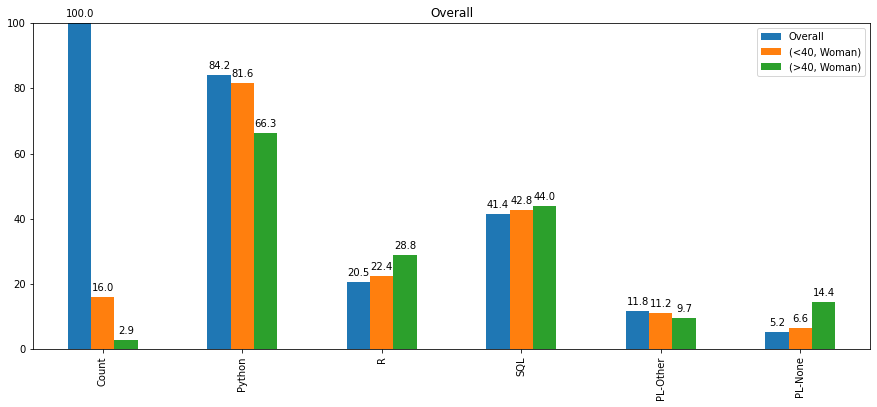

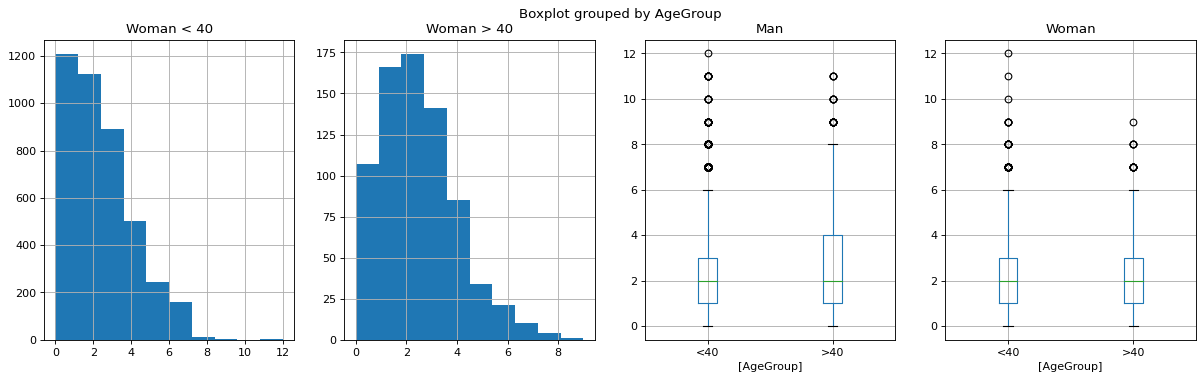

In [3266]:
df_summary = summarise(df, df_new, 'PL', COLS_PL, COLS_PL_OTHER, 
            'Q7_Part_1', 'Python', "Python",
            'Q7_Part_2', 'R', "R",
            'Q7_Part_3', 'SQL', "SQL", 
            'Q7_Part_12')

In [3267]:
df_result

,Count-Median,W<40-Median,W>40-Median,Count-Max,W<40-Max,W>40-Max
PL,2.0,2.0,2.0,12.0,12.0,9.0


/var/folders/6d/t1t1r89n1q95d2ztv2qstyb40000gr/T/ipykernel_98191/2497906190.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared

/var/folders/6d/t1t1r89n1q95d2ztv2qstyb40000gr/T/ipykernel_98191/2497906190.py:4: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared

/Users/sreedevigattu/sree/projects/mlds/venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/boxplot.py:394: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared

/Users/sreedevigattu/sree/projects/mlds/venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/boxplot.py:394: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<AxesSubplot:title={'center':'PL-Count'}, xlabel='[AgeGroup]'>,
        <AxesSubplot:title={'center':'PL-None'}, xlabel='[AgeGroup]'>],
       [<AxesSubplot:title={'center':'PL-Other'}, xlabel='[AgeGroup]'>,
        <AxesSubplot:title={'center':'Python'}, xlabel='[AgeGroup]'>],
       [<AxesSubplot:title={'center':'R'}, xlabel='[AgeGroup]'>,
        <AxesSubplot:title={'center':'SQL'}, xlabel='[AgeGroup]'>]],
      dtype=object)

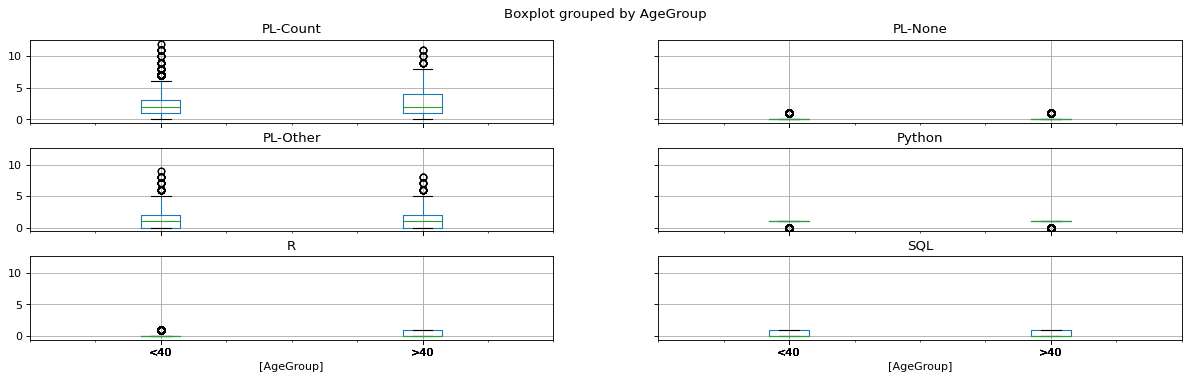

In [3268]:
plt.figure(figsize=(18, 5), dpi=80)

ax = plt.subplot(1, 4, 1); df_new.hist(ax=ax)
ax = plt.subplot(1, 4, 2); df_new.hist(ax=ax)
ax = plt.subplot(1, 4, 3); df_new.boxplot(by='AgeGroup', ax=ax)
ax = plt.subplot(1, 4, 4); df_new.boxplot(by='AgeGroup',ax=ax)

        Overall
Python    21860
R          5334
SQL       10756
Other     27618
None        319
        Overall  (<40, Woman)  (>40, Woman)
Count    100.00         15.97          2.86
Python    84.16         81.60         66.35
R         20.54         22.45         28.80
SQL       41.41         42.78         44.01
Other     11.81         11.18          9.72
None       1.23          1.52          4.44
  AgeGroup  PL-Count
0      >40         2
1      >40         4
2      <40         3
3      >40         1
4      >40         3
   AgeGroup  PL-Count
5       <40         1
6       <40         3
11      <40         3
12      <40         2
21      <40         4


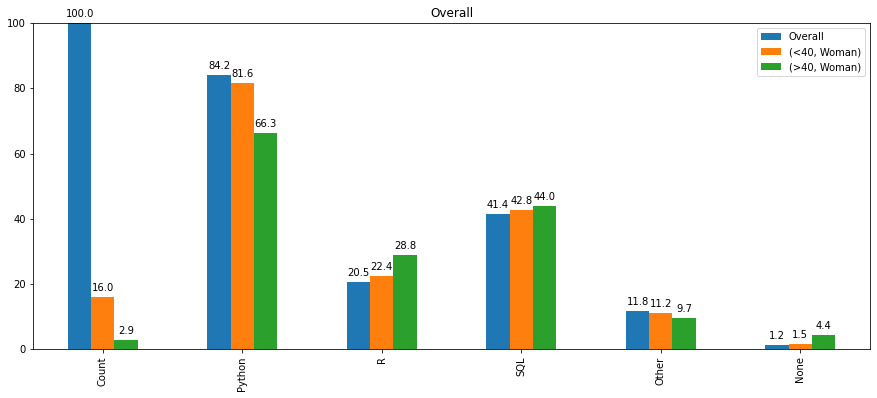

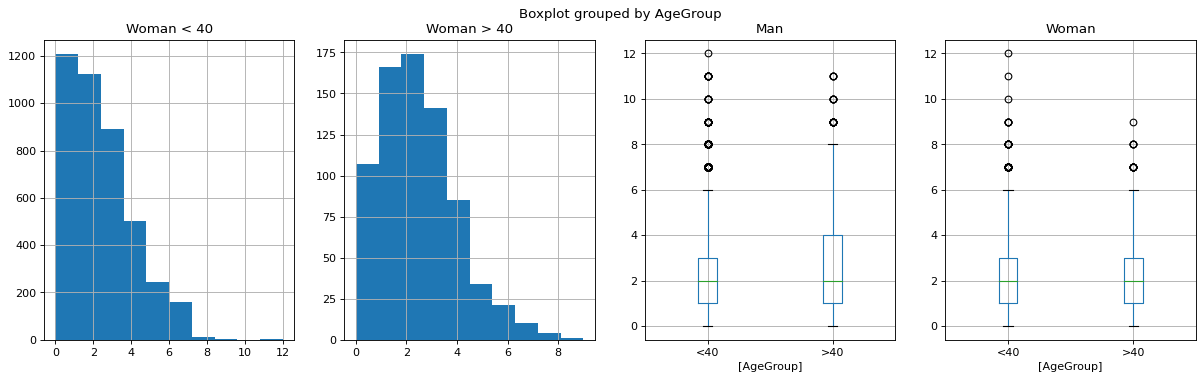

In [3269]:
# Create a new column IDE Count to store the number of IDEs used
df_new['PL-Count'] = df[COLS_PL].count(axis=1)
df_new.head()

df_new['Python'] = df['Q7_Part_1']; df_new['Python'] = df_new['Python'].apply(lambda x: 1 if x=="Python" else 0)
df_new['R'] = df['Q7_Part_2'];      df_new['R'] = df_new['R'].apply(lambda x: 1 if x=="R" else 0)
df_new['SQL'] = df['Q7_Part_3'];    df_new['SQL'] = df_new['SQL'].apply(lambda x: 1 if x=="SQL" else 0)
df_new['None'] = df['Q7_Part_12'];  df_new['None'] = df_new['None'].apply(lambda x: 1 if x=="None" else 0)
df_new['Other'] = df[COLS_PL_OTHER].count(axis=1) # df_new['Other'] = df['Q7_Part_4'] + df['Q7_Part_5'] + df['Q7_Part_6'] + df['Q7_Part_7'] + df['Q7_Part_8'] + df['Q7_Part_9'] + df['Q7_Part_10'] + df['Q7_Part_11'] + df['Q7_OTHER']
df_new['ProgLang'] = df['Q8']
df_new['ProgLangCount'] = df[COLS_PL].count(axis=1) # None is not considered
df_new.head()


# Create a df with the IDE and total number of IDE users
df_temp, df_pl_summary = createSpecificAndSummary(df_new, 'Python', 'R', 'SQL', 'Other', 'None',COLS_PL_OTHER)
compare(df, df_pl_summary, df_temp, 'Other', COLS_PL_OTHER)
plotBox(df_new, 'PL-Count')

- A mere 3% of the total community is >40 women.
- 66-44 use Python-SQL
- 4.4 use None

In [3270]:
print(df_new['Python'].sum(), df_new[df_new['Python']==0]['Python'].count(), df_new.shape[0])

21860 4113 25973


In [3271]:
def abc(label, lt40, gt40):
    print(f"{label:5}    <40: {percent(lt40,df.shape[0]):2.2f}%    >40: {percent(gt40,df.shape[0]):2.2f}%")

abc("Woman", 4147, 743)
abc("Man", 15956, 4642)

Woman    <40: 15.97%    >40: 2.86%
Man      <40: 61.43%    >40: 17.87%


<AxesSubplot:>

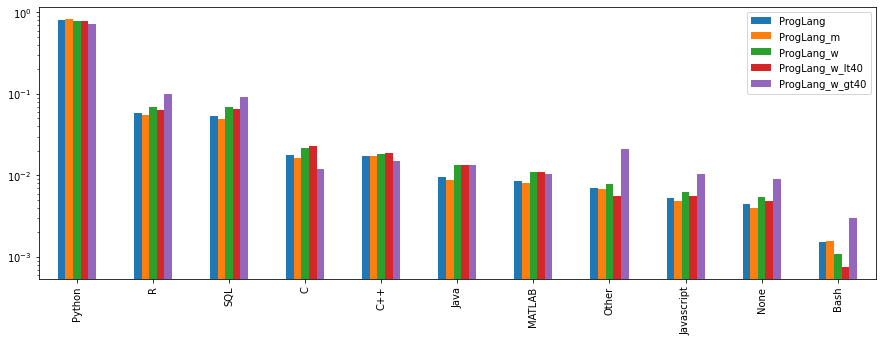

In [3272]:
def my_value_counts(df, col):
    df_ = df['ProgLang'].value_counts(normalize=True).to_frame()
    #print(df_pl_all)
    return df_
df_pl_all = my_value_counts(df_new, 'ProgLang') 
df_pl_man = my_value_counts(df_man, 'ProgLang') 
df_pl_woman =  my_value_counts(df_woman, 'df_woman')
df_pl_woman_lt40 =  my_value_counts(df_woman[df_woman['AgeGroup']=='<40'], 'ProgLang') 
df_pl_woman_gt40 =  my_value_counts(df_woman[df_woman['AgeGroup']=='>40'], 'ProgLang') 
df_res = pd.merge(df_pl_man, df_pl_woman, left_index=True, right_index=True,suffixes=['_m','_w'])
df_res = pd.merge(df_res, df_pl_woman_lt40, left_index=True, right_index=True)
df_res = pd.merge(df_res, df_pl_woman_gt40, left_index=True, right_index=True,suffixes=['_w_lt40','_w_gt40'])
df_res = pd.merge(df_pl_all, df_res, left_index=True, right_index=True)
round(df_res*100,1)
df_res.plot.bar(figsize=(15,5), logy=True)

### IDE

#### IDE - Data Processing

In [3273]:
# Get the list of IDE columns (apart from None)
COLS_IDE_NONE = ['Q9_Part_12']
COLS_IDE = list(filter(lambda x: True if x[0][:2]=='Q9' and x[0] not in COLS_IDE_NONE else False, df.columns.to_list()))
# Sort the IDEs based on the count
df[COLS_IDE].count().sort_values(ascending=False)

Q9_Part_11  Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Jupyter Notebook                                16233
Q9_Part_4   Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Visual Studio Code (VSCode)                     10040
Q9_Part_5   Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  PyCharm                                          7468
Q9_Part_1   Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - Jupyter (JupyterLab, Jupyter Notebooks, etc)      5488
Q9_Part_2   Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  RStu

In [3274]:
# Categorise the list of columns that are top3 and not top3
COLS_IDE_TOP3 = ['Q9_Part_11','Q9_Part_4','Q9_Part_5']
COLS_IDE_OTHER = list(filter(lambda x: True if x[0] not in COLS_IDE_TOP3 else False, COLS_IDE))

print(f"{'COLS_IDE':14} {len(COLS_IDE):2}", end=': ');            [print(col[0], end=', ') for col in COLS_IDE]; print()
print(f"{'COLS_IDE_TOP3':14} {len(COLS_IDE_TOP3):2}", end=': ');  [print(col, end=', ') for col in COLS_IDE_TOP3]; print()
print(f"{'COLS_IDE_OTHER':14} {len(COLS_IDE_OTHER):2}", end=': ');[print(col[0], end=', ') for col in COLS_IDE_OTHER]; print()
print(f"{'COLS_IDE_NONE':14} {len(COLS_IDE_NONE):2}", end=': ');  [print(col, end=', ') for col in COLS_IDE_NONE]; print()

df[COLS_IDE].head()

COLS_IDE       12: Q9_Part_1, Q9_Part_2, Q9_Part_3, Q9_Part_4, Q9_Part_5, Q9_Part_6, Q9_Part_7, Q9_Part_8, Q9_Part_9, Q9_Part_10, Q9_Part_11, Q9_OTHER, 
COLS_IDE_TOP3   3: Q9_Part_11, Q9_Part_4, Q9_Part_5, 
COLS_IDE_OTHER  9: Q9_Part_1, Q9_Part_2, Q9_Part_3, Q9_Part_6, Q9_Part_7, Q9_Part_8, Q9_Part_9, Q9_Part_10, Q9_OTHER, 
COLS_IDE_NONE   1: Q9_Part_12, 


,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER
,"Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Jupyter (JupyterLab, Jupyter Notebooks, etc)",Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - RStudio,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Visual Studio,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Visual Studio Code (VSCode),Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - PyCharm,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Spyder,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Notepad++,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Sublime Text,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Vim / Emacs,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Jupyter Notebook,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice - Other
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vim / Emacs,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,Notepad++,NaN,NaN,NaN,Jupyter Notebook,NaN
2,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,Other
3,NaN,NaN,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN
4,NaN,NaN,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,MATLAB,Jupyter Notebook,NaN


#### Story...

BEFORE 0 1351
AFTER 1738
     Age Gender    Country AgeGroup  PL-Count  Python  R  SQL  PL-None  \
0  50-54    Man      India      >40         2       1  1    0        0   
1  50-54    Man  Indonesia      >40         4       0  0    1        0   
2  22-24    Man   Pakistan      <40         3       1  0    0        0   
3  45-49    Man     Mexico      >40         1       1  0    0        0   
4  45-49    Man      India      >40         3       1  0    0        0   

   PL-Other  None  Other ProgLang  ProgLangCount  IDE-Count  JupyterNB  \
0         0     0      0   Python              2          1          0   
1         3     0      3   Python              4          2          1   
2         2     0      2   Python              3          3          1   
3         0     0      0   Python              1          2          1   
4         2     0      2   Python              3          3          1   

   VSCode  PyCharm  IDE-None  IDE-Other  
0       0        0         0          1  
1

,Overall,"(<40, Woman)","(>40, Woman)"
Count,100.00,15.97,2.86
JupyterNB,62.50,62.82,56.39
VSCode,38.66,32.17,19.11
PyCharm,28.75,27.18,14.94
IDE-Other,12.95,12.59,12.89
IDE-None,2.03,2.27,6.86


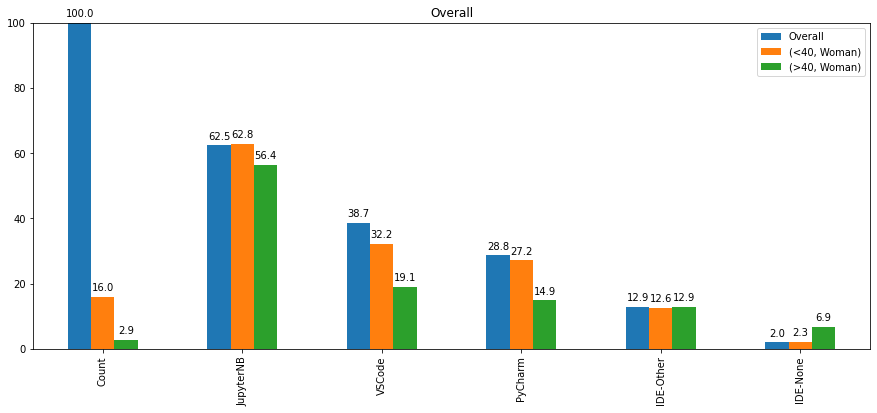

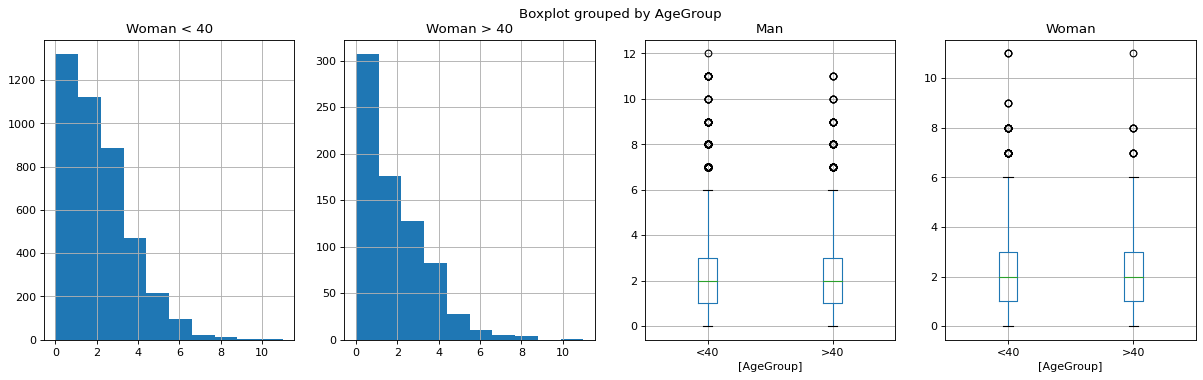

In [3275]:
summarise(df, df_new, 'IDE', COLS_IDE, COLS_IDE_OTHER, 
            'Q9_Part_11', 'JupyterNB', "Jupyter Notebook",
            'Q9_Part_4', 'VSCode', "Visual Studio Code (VSCode)",
            'Q9_Part_5', 'PyCharm', "PyCharm", 
            'Q9_Part_12')

- Similar trend in the IDE usage as well.
- None is a little higher than the other categories

### Hosted Notebooks

In [3276]:
# Get the list of IDE columns (apart from None)
COLS_HNB_NONE = ['Q10_Part_16']
COLS_HNB = list(filter(lambda x: True if x[0][:3]=='Q10' and x[0] not in COLS_HNB_NONE else False, df.columns.to_list()))
# Sort the NBs based on the count
df[COLS_HNB].count().sort_values(ascending=False)

Q10_Part_2   Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Colab Notebooks                                      9792
Q10_Part_1   Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Kaggle Notebooks                                    9507
Q10_Part_10  Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Google Cloud Notebooks (AI Platform / Vertex AI)     2051
Q10_Part_11  Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Google Cloud Datalab                                 1794
Q10_Part_5   Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Binder / JupyterHub                                 1770
Q10_Part_7   Which of the

In [3277]:
# Categorise the list of columns that are top3 and not top3
COLS_HNB_TOP3 = ['Q10_Part_2','Q10_Part_1','Q10_Part_10']
COLS_HNB_OTHER = list(filter(lambda x: True if x[0] not in COLS_HNB_TOP3 else False, COLS_HNB))

print(f"{'COLS_HNB':19} {len(COLS_HNB):2d}", end=': ');               [print(col[0], end=', ') for col in COLS_HNB]; print()
print(f"{'COLS_HNB_TOP3':19} {len(COLS_HNB_TOP3):2d}", end=': ');     [print(col, end=', ') for col in COLS_HNB_TOP3]; print()
print(f"{'COLS_HNB_OTHER':19} {len(COLS_HNB_OTHER):2d}", end=': ');   [print(col[0], end=', ') for col in COLS_HNB_OTHER]; print()
print(f"{'COLS_HNB_NONE':19} {len(COLS_HNB_NONE):2d}", end=': ');     [print(col, end=', ') for col in COLS_HNB_NONE]; print()

df[COLS_HNB].head()

COLS_HNB            16: Q10_Part_1, Q10_Part_2, Q10_Part_3, Q10_Part_4, Q10_Part_5, Q10_Part_6, Q10_Part_7, Q10_Part_8, Q10_Part_9, Q10_Part_10, Q10_Part_11, Q10_Part_12, Q10_Part_13, Q10_Part_14, Q10_Part_15, Q10_OTHER, 
COLS_HNB_TOP3        3: Q10_Part_2, Q10_Part_1, Q10_Part_10, 
COLS_HNB_OTHER      13: Q10_Part_3, Q10_Part_4, Q10_Part_5, Q10_Part_6, Q10_Part_7, Q10_Part_8, Q10_Part_9, Q10_Part_11, Q10_Part_12, Q10_Part_13, Q10_Part_14, Q10_Part_15, Q10_OTHER, 
COLS_HNB_NONE        1: Q10_Part_16, 


,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_OTHER
,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice - Kaggle Notebooks,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice - Colab Notebooks,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice - Azure Notebooks,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice - Paperspace / Gradient,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice - Binder / JupyterHub,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice - Code Ocean,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice - IBM Watson Studio,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice - Amazon Sagemaker Studio Notebooks,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice - Amazon EMR Notebooks,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice - Google Cloud Notebooks (AI Platform / Vertex AI),Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice - Google Cloud Datalab,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice - Databricks Collaborative Notebooks,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice - Zeppelin / Zepl Notebooks,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice - Deepnote Notebooks,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice - Observable Notebooks,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice - Other
0,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Datalab,NaN,NaN,NaN,NaN,NaN


BEFORE 0 1738
AFTER 8527
     Age Gender    Country AgeGroup  PL-Count  Python  R  SQL  PL-None  \
0  50-54    Man      India      >40         2       1  1    0        0   
1  50-54    Man  Indonesia      >40         4       0  0    1        0   
2  22-24    Man   Pakistan      <40         3       1  0    0        0   
3  45-49    Man     Mexico      >40         1       1  0    0        0   
4  45-49    Man      India      >40         3       1  0    0        0   

   PL-Other  ...  VSCode  PyCharm IDE-None  IDE-Other  HNB-Count  HNB-Colab  \
0         0  ...       0        0        0          1          1          1   
1         3  ...       0        0        0          1          2          1   
2         2  ...       0        1        0          1          1          0   
3         0  ...       0        0        0          1          1          1   
4         2  ...       0        0        0          2          1          0   

   HNB-Kaggle  HNB-Google  HNB-None  HNB-Other  
0     

,Overall,"(<40, Woman)","(>40, Woman)"
Count,100.00,15.97,2.86
HNB-Colab,37.70,35.01,28.26
HNB-Kaggle,36.60,34.63,26.51
HNB-Google,7.90,7.76,6.46
HNB-Other,2.71,2.63,2.68
HNB-None,27.62,27.54,33.51


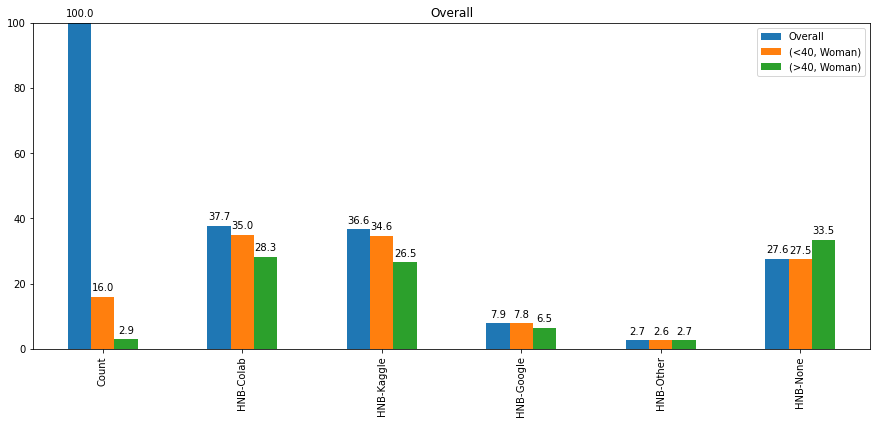

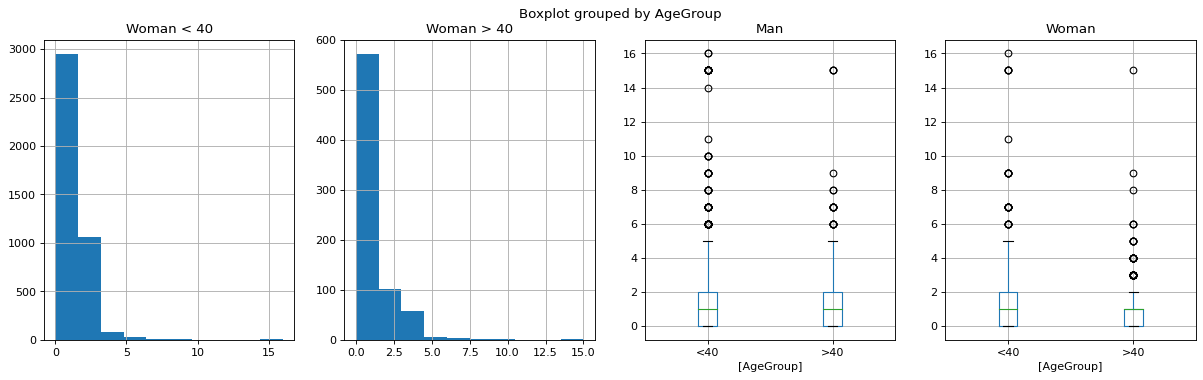

In [3278]:
summarise(df, df_new, 'HNB', COLS_HNB, COLS_HNB_OTHER, 
            'Q10_Part_2', 'HNB-Colab', "Colab Notebooks",
            'Q10_Part_1', 'HNB-Kaggle', "Kaggle Notebooks",
            'Q10_Part_10', 'HNB-Google', "Google Cloud Notebooks (AI Platform / Vertex AI)", 
            'Q10_Part_16')

### Hardware

In [3279]:
# Get the list of IDE columns (apart from None)
COLS_HW_NONE = ['Q12_Part_5']
COLS_HW = list(filter(lambda x: True if x[0][:3]=='Q12' and x[0] not in COLS_HW_NONE else False, df.columns.to_list()))
# Sort the NBs based on the count
df[COLS_HW].count().sort_values(ascending=False)

Q12_Part_1  Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice -  NVIDIA GPUs              8036
Q12_Part_2  Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice -  Google Cloud TPUs        3451
Q12_OTHER   Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice - Other                      867
Q12_Part_4  Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice -  AWS Inferentia Chips      416
Q12_Part_3  Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice -  AWS Trainium Chips        414
dtype: int64

In [3280]:
# Categorise the list of columns that are top3 and not top3
COLS_HW_TOP3 = ['Q12_Part_1','Q10_Part_2','Q10_Part_4']
COLS_HW_OTHER = list(filter(lambda x: True if x[0] not in COLS_HW_TOP3 else False, COLS_HW))

print(f"{'COLS_HW':14} {len(COLS_HW):2d}", end=': ');               [print(col[0], end=', ') for col in COLS_HW]; print()
print(f"{'COLS_HW_TOP3':14} {len(COLS_HW_TOP3):2d}", end=': ');     [print(col, end=', ') for col in COLS_HW_TOP3]; print()
print(f"{'COLS_HW_OTHER':14} {len(COLS_HW_OTHER):2d}", end=': ');   [print(col[0], end=', ') for col in COLS_HW_OTHER]; print()
print(f"{'COLS_HW_NONE':14} {len(COLS_HW_NONE):2d}", end=': ');     [print(col, end=', ') for col in COLS_HW_NONE]; print()

df[COLS_HW].head()

COLS_HW         5: Q12_Part_1, Q12_Part_2, Q12_Part_3, Q12_Part_4, Q12_OTHER, 
COLS_HW_TOP3    3: Q12_Part_1, Q10_Part_2, Q10_Part_4, 
COLS_HW_OTHER   4: Q12_Part_2, Q12_Part_3, Q12_Part_4, Q12_OTHER, 
COLS_HW_NONE    1: Q12_Part_5, 


,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_OTHER
,Which types of specialized hardware do you use on a regular basis? (Select all that apply) - Selected Choice - NVIDIA GPUs,Which types of specialized hardware do you use on a regular basis? (Select all that apply) - Selected Choice - Google Cloud TPUs,Which types of specialized hardware do you use on a regular basis? (Select all that apply) - Selected Choice - AWS Trainium Chips,Which types of specialized hardware do you use on a regular basis? (Select all that apply) - Selected Choice - AWS Inferentia Chips,Which types of specialized hardware do you use on a regular basis? (Select all that apply) - Selected Choice - Other
0,NaN,Google Cloud TPUs,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Other
3,NVIDIA GPUs,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


BEFORE 0 8527
AFTER 16772
     Age Gender    Country AgeGroup  PL-Count  Python  R  SQL  PL-None  \
0  50-54    Man      India      >40         2       1  1    0        0   
1  50-54    Man  Indonesia      >40         4       0  0    1        1   
2  22-24    Man   Pakistan      <40         3       1  0    0        0   
3  45-49    Man     Mexico      >40         1       1  0    0        0   
4  45-49    Man      India      >40         3       1  0    0        1   

   PL-Other  ...  HNB-Kaggle  HNB-Google HNB-None  HNB-Other  HW-Count  \
0         0  ...           0           0        0          0         1   
1         3  ...           1           0        0          0         0   
2         2  ...           1           0        0          0         1   
3         0  ...           0           0        0          0         1   
4         2  ...           0           0        0          1         0   

   HW-Nvidia  HW-GCTPU  HW-AWSIC  HW-None  HW-Other  
0          0         1        

,Overall,"(<40, Woman)","(>40, Woman)"
Count,100.00,15.97,2.86
HW-Nvidia,30.94,19.29,17.77
HW-GCTPU,13.29,12.83,11.17
HW-AWSIC,1.60,1.59,1.08
HW-Other,4.96,5.24,4.74
HW-None,50.95,57.99,57.47


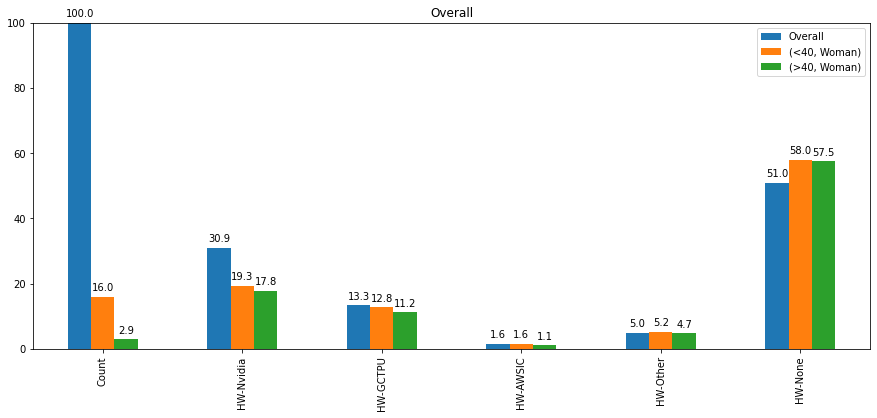

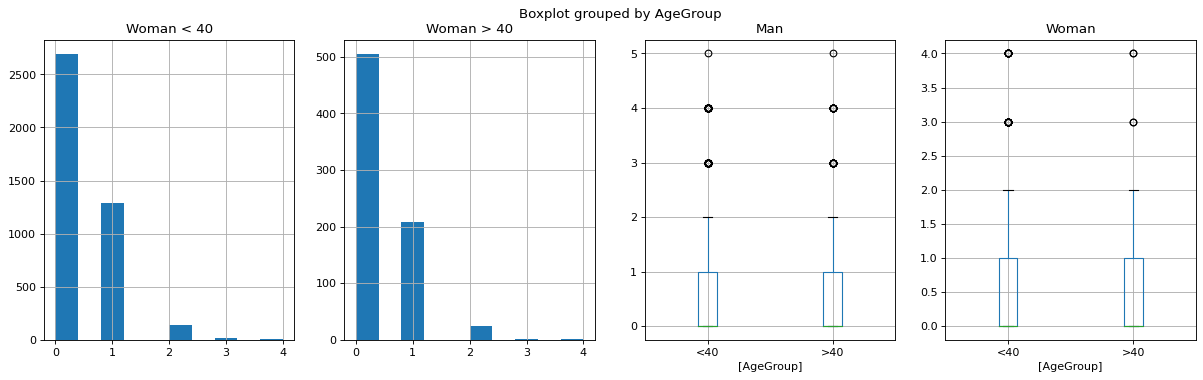

In [3281]:
summarise(df, df_new, 'HW', COLS_HW, COLS_HW_OTHER, 
            'Q12_Part_1', 'HW-Nvidia', "NVIDIA GPUs",
            'Q12_Part_2', 'HW-GCTPU', "Google Cloud TPUs",
            'Q12_Part_4', 'HW-AWSIC', "AWS Inferentia Chips", 
            'Q12_Part_5')

### XXX

COLS_HNB            16: Q10_Part_1, Q10_Part_2, Q10_Part_3, Q10_Part_4, Q10_Part_5, Q10_Part_6, Q10_Part_7, Q10_Part_8, Q10_Part_9, Q10_Part_10, Q10_Part_11, Q10_Part_12, Q10_Part_13, Q10_Part_14, Q10_Part_15, Q10_OTHER, 
COLS_HNB_TOP3        3: Q10_Part_2, Q10_Part_1, Q10_Part_10, 
COLS_HNB_OTHER      13: Q10_Part_3, Q10_Part_4, Q10_Part_5, Q10_Part_6, Q10_Part_7, Q10_Part_8, Q10_Part_9, Q10_Part_11, Q10_Part_12, Q10_Part_13, Q10_Part_14, Q10_Part_15, Q10_OTHER, 
COLS_HNB_NONE        1: Q10_Part_16, 
BEFORE 0 16772
AFTER 16772
     Age Gender    Country AgeGroup  PL-Count  Python  R  SQL  PL-None  \
0  50-54    Man      India      >40         2       1  1    0        0   
1  50-54    Man  Indonesia      >40         4       0  0    1        1   
2  22-24    Man   Pakistan      <40         3       1  0    0        0   
3  45-49    Man     Mexico      >40         1       1  0    0        0   
4  45-49    Man      India      >40         3       1  0    0        1   

   PL-Other  ...  HNB

,Overall,"(<40, Woman)","(>40, Woman)"
Count,100.00,15.97,2.86
HW-Nvidia,30.94,19.29,17.77
HW-GCTPU,13.29,12.83,11.17
HW-AWSIC,1.60,1.59,1.08
HW-Other,4.96,5.24,4.74
HW-None,50.95,57.99,57.47


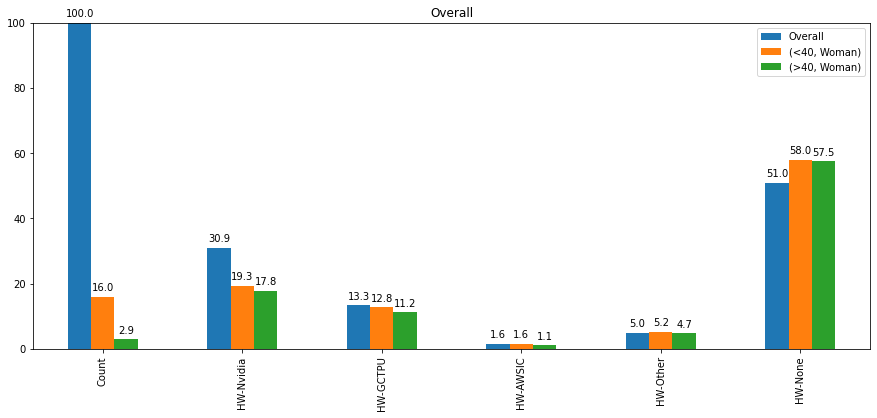

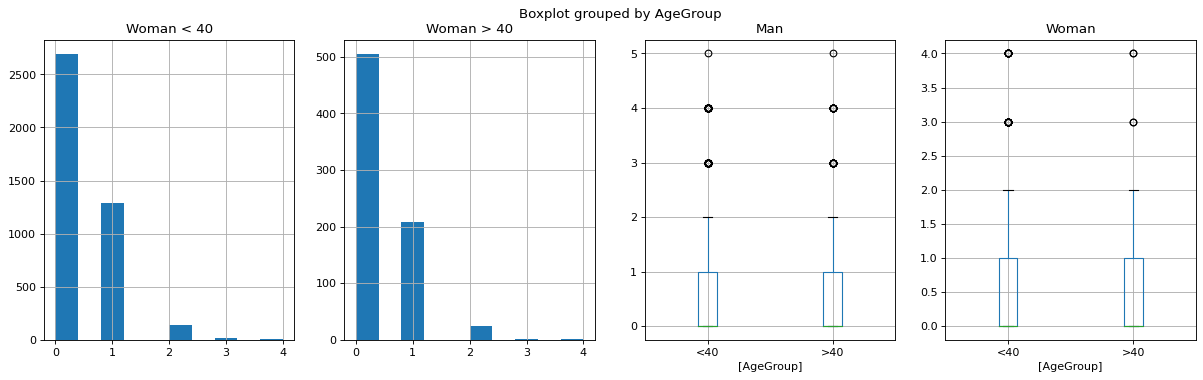

In [3282]:
# Get the list of IDE columns (apart from None)
COLS_HNB_NONE = ['Q10_Part_16']
COLS_HNB = list(filter(lambda x: True if x[0][:3]=='Q10' and x[0] not in COLS_HNB_NONE else False, df.columns.to_list()))
# Sort the NBs based on the count
df[COLS_HNB].count().sort_values(ascending=False)

#--------------------
# Categorise the list of columns that are top3 and not top3
COLS_HNB_TOP3 = ['Q10_Part_2','Q10_Part_1','Q10_Part_10']
COLS_HNB_OTHER = list(filter(lambda x: True if x[0] not in COLS_HNB_TOP3 else False, COLS_HNB))

print(f"{'COLS_HNB':19} {len(COLS_HNB):2d}", end=': ');               [print(col[0], end=', ') for col in COLS_HNB]; print()
print(f"{'COLS_HNB_TOP3':19} {len(COLS_HNB_TOP3):2d}", end=': ');     [print(col, end=', ') for col in COLS_HNB_TOP3]; print()
print(f"{'COLS_HNB_OTHER':19} {len(COLS_HNB_OTHER):2d}", end=': ');   [print(col[0], end=', ') for col in COLS_HNB_OTHER]; print()
print(f"{'COLS_HNB_NONE':19} {len(COLS_HNB_NONE):2d}", end=': ');     [print(col, end=', ') for col in COLS_HNB_NONE]; print()

df[COLS_HNB].head()
#--------------------
summarise(df, df_new, 'HW', COLS_HW, COLS_HW_OTHER, 
            'Q12_Part_1', 'HW-Nvidia', "NVIDIA GPUs",
            'Q12_Part_2', 'HW-GCTPU', "Google Cloud TPUs",
            'Q12_Part_4', 'HW-AWSIC', "AWS Inferentia Chips", 
            'Q12_Part_5')

### Next

In [3283]:
COLS_XXX = ['Age','Gender','AgeGroup','PL-Count','PL-None','IDE-Count','IDE-None','HNB-Count','HNB-None','HW-Count','HW-None']
COLS_XXX_INT = ['PL-Count','PL-None','IDE-Count','IDE-None','HNB-Count','HNB-None','HW-Count','HW-None']
COLS_XXX_COUNT = ['PL-Count','IDE-Count','HNB-Count','HW-Count']
COLS_XXX_NONE = ['PL-None','IDE-None','HNB-None','HW-None']
df_new[COLS_XXX].head()

,Age,Gender,AgeGroup,PL-Count,PL-None,IDE-Count,IDE-None,HNB-Count,HNB-None,HW-Count,HW-None
0,50-54,Man,>40,2,0,1,0,1,0,1,0
1,50-54,Man,>40,4,1,2,0,2,0,0,1
2,22-24,Man,<40,3,0,3,0,1,0,1,0
3,45-49,Man,>40,1,0,2,0,1,0,1,0
4,45-49,Man,>40,3,1,3,0,1,0,0,1


           Overall    <40   >40
PL-Count     65568  10262  1684
PL-None      16772   2933   555
IDE-Count    64020   9765  1534
IDE-None       526     94    51
HNB-Count    30513   4630   714
HNB-None      7174   1142   249
HW-Count     13184   1669   273
HW-None      13234   2405   427


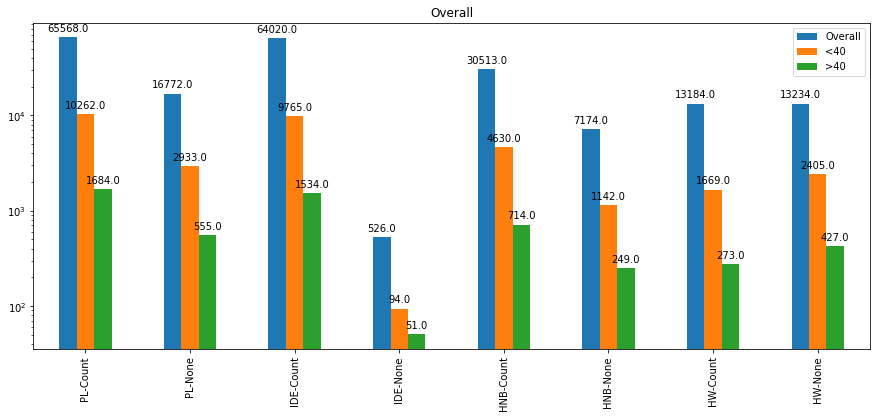

In [3284]:
# TODO: Percentage as well
# Concatenate the overall and the woman < 40 and woman > 40 data 
df_temp = pd.concat([df_new[COLS_XXX_INT].sum(), 
                    df_new[(df_new['Gender']=='Woman') & (df_new['AgeGroup']=='<40')][COLS_XXX_INT].sum(), 
                    df_new[(df_new['Gender']=='Woman') & (df_new['AgeGroup']=='>40')][COLS_XXX_INT].sum()], 
                    axis=1, join='inner')
df_temp.rename(columns={0:'Overall',1:'<40',2:'>40'}, inplace=True)
print(df_temp)
ax = df_temp.plot.bar(logy=True, figsize=(15, 6));annotate(ax, "Overall") #ylim=(0,100),

           Overall    <40   >40
PL-Count     65568  10262  1684
IDE-Count    64020   9765  1534
HNB-Count    30513   4630   714
HW-Count     13184   1669   273


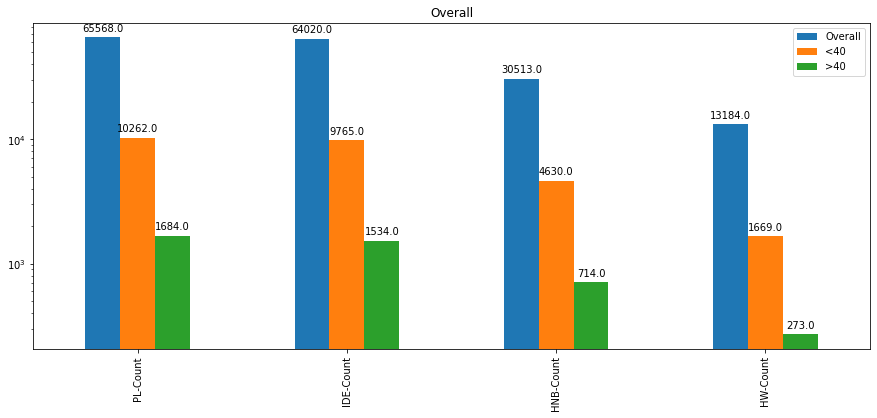

In [3285]:
# Concatenate the overall and the woman < 40 and woman > 40 data 
df_temp = pd.concat([
                    df_new[COLS_XXX_COUNT].sum(), 
                    df_new[(df_new['Gender']=='Woman') & (df_new['AgeGroup']=='<40')][COLS_XXX_COUNT].sum(), 
                    df_new[(df_new['Gender']=='Woman') & (df_new['AgeGroup']=='>40')][COLS_XXX_COUNT].sum()], 
                    axis=1, join='inner')
df_temp.rename(columns={0:'Overall',1:'<40',2:'>40'}, inplace=True)
print(df_temp)
ax = df_temp.plot.bar(logy=True, figsize=(15, 6));annotate(ax, "Overall") #ylim=(0,100),

### Using NONE

          Overall  Woman<40  Woman>40
PL-None     64.57     70.73     74.70
IDE-None     2.03      2.27      6.86
HNB-None    27.62     27.54     33.51
HW-None     50.95     57.99     57.47


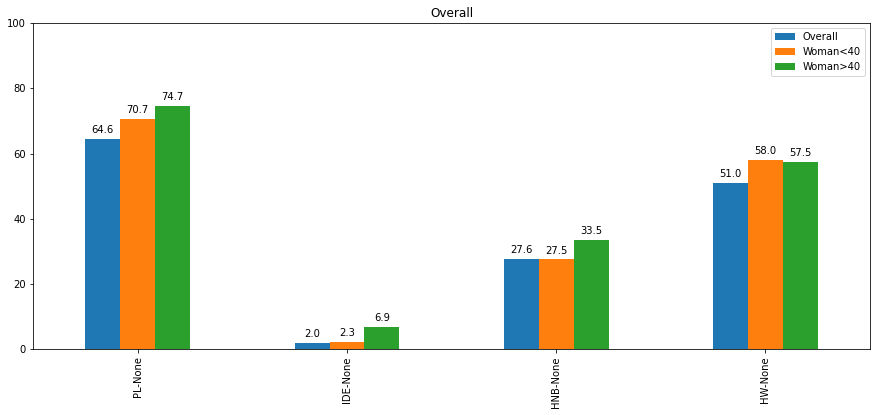

In [3286]:
# Concatenate the overall and the woman < 40 and woman > 40 data 
df_temp = pd.concat([df_new[COLS_XXX_NONE].sum(), 
                    df_new[(df_new['Gender']=='Woman') & (df_new['AgeGroup']=='<40')][COLS_XXX_NONE].sum(), 
                    df_new[(df_new['Gender']=='Woman') & (df_new['AgeGroup']=='>40')][COLS_XXX_NONE].sum()], 
                    axis=1, join='inner')
df_temp.rename(columns={0:'Overall',1:'Woman<40',2:'Woman>40'}, inplace=True)
df_temp['Overall'] = round((df_temp['Overall']/df.shape[0])*100,2)
df_temp['Woman<40'] = round((df_temp['Woman<40']/df_new[(df_new['Gender']=='Woman') & (df_new['AgeGroup']=='<40')].shape[0])*100,2)
df_temp['Woman>40'] = round((df_temp['Woman>40']/df_new[(df_new['Gender']=='Woman') & (df_new['AgeGroup']=='>40')].shape[0])*100,2)
print(df_temp)
ax = df_temp.plot.bar(ylim=(0,100),figsize=(15, 6));annotate(ax, "Overall") #ylim=(0,100),

### Median Values

In [3287]:
df_result

,Count-Median,W<40-Median,W>40-Median,Count-Max,W<40-Max,W>40-Max
PL,2.0,2.0,2.0,12.0,12.0,9.0
IDE,2.0,2.0,2.0,12.0,11.0,11.0
HNB,1.0,1.0,1.0,16.0,16.0,15.0
HW,0.0,0.0,0.0,5.0,4.0,4.0


### Profession

In [3288]:
COLS_ML_USE = ('Q15','For how many years have you used machine learning methods?')
print(df[COLS_ML_USE].value_counts(normalize=True)*100);print()

COLS_PL_USE = ('Q6', 'For how many years have you been writing code and/or programming?')
print(df[COLS_PL_USE].value_counts(normalize=True)*100)

Under 1 year                             38.574556
1-2 years                                19.680896
I do not use machine learning methods    16.371979
2-3 years                                 9.703629
3-4 years                                 4.929696
5-10 years                                4.348741
4-5 years                                 3.978277
10-20 years                               1.523954
20 or more years                          0.888271
Name: (Q15, For how many years have you used machine learning methods?), dtype: float64

1-3 years                    30.316097
< 1 years                    22.642744
3-5 years                    15.635468
5-10 years                   11.931621
10-20 years                   8.339429
20+ years                     7.161283
I have never written code     3.973357
Name: (Q6, For how many years have you been writing code and/or programming?), dtype: float64


In [3289]:
df_new['MLUsage'] = df[COLS_ML_USE].apply(lambda x: '0 years' if x == 'I do not use machine learning methods' else x )
df_new['PLUsage'] = df[COLS_PL_USE].apply(lambda x: '0 years' if x == 'I have never written code' else x)

COLS_USAGE = ['Age','Gender','AgeGroup','PL-Count','MLUsage','PLUsage']
df_new[COLS_USAGE].head()

,Age,Gender,AgeGroup,PL-Count,MLUsage,PLUsage
0,50-54,Man,>40,2,5-10 years,5-10 years
1,50-54,Man,>40,4,Under 1 year,20+ years
2,22-24,Man,<40,3,0 years,1-3 years
3,45-49,Man,>40,1,5-10 years,20+ years
4,45-49,Man,>40,3,10-20 years,< 1 years


In [3290]:
df_temp = df_new[(df_new['Gender']=='Woman') & (df_new['AgeGroup']=='<40')][COLS_USAGE].groupby(by=['MLUsage','PLUsage']).agg({ 'MLUsage': 'count'})
df_temp.rename(columns={'MLUsage':'Count'},inplace=True)
df_temp.reset_index(inplace=True)
df_temp.sort_values(by=['MLUsage','PLUsage'])

,MLUsage,PLUsage,Count
0,0 years,1-3 years,238
1,0 years,10-20 years,8
2,0 years,20+ years,1
3,0 years,3-5 years,67
4,0 years,5-10 years,47
5,0 years,< 1 years,406
6,1-2 years,1-3 years,323
7,1-2 years,10-20 years,19
8,1-2 years,20+ years,1
9,1-2 years,3-5 years,163


In [3291]:
df_temp[df_temp['MLUsage'] == '20 or more years']

,MLUsage,PLUsage,Count
21,20 or more years,20+ years,1
22,20 or more years,< 1 years,2


In [3292]:
df_mlpl = pd.pivot_table(df_temp, index=['PLUsage'], columns = ['MLUsage'], values ='Count', aggfunc=np.sum)
df_mlpl

MLUsage,0 years,1-2 years,10-20 years,2-3 years,20 or more years,3-4 years,4-5 years,5-10 years,Under 1 year
PLUsage,,,,,,,,,
1-3 years,238.0,323.0,NaN,91.0,NaN,8.0,3.0,4.0,683.0
10-20 years,8.0,19.0,16.0,10.0,NaN,17.0,15.0,21.0,25.0
20+ years,1.0,1.0,2.0,1.0,1.0,1.0,4.0,NaN,NaN
3-5 years,67.0,163.0,NaN,93.0,NaN,52.0,25.0,5.0,198.0
5-10 years,47.0,69.0,1.0,59.0,NaN,39.0,43.0,32.0,91.0
< 1 years,406.0,62.0,NaN,8.0,2.0,NaN,2.0,2.0,698.0


In [3293]:
df_mlpl = df_mlpl[['0 years', 'Under 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-10 years', '10-20 years', '20 or more years']]
df_mlpl = df_mlpl.reindex(index = ['< 1 years', '1-3 years','3-5 years', '5-10 years', '10-20 years', '20+ years'] )
df_mlpl

MLUsage,0 years,Under 1 year,1-2 years,2-3 years,3-4 years,4-5 years,5-10 years,10-20 years,20 or more years
PLUsage,,,,,,,,,
< 1 years,406.0,698.0,62.0,8.0,NaN,2.0,2.0,NaN,2.0
1-3 years,238.0,683.0,323.0,91.0,8.0,3.0,4.0,NaN,NaN
3-5 years,67.0,198.0,163.0,93.0,52.0,25.0,5.0,NaN,NaN
5-10 years,47.0,91.0,69.0,59.0,39.0,43.0,32.0,1.0,NaN
10-20 years,8.0,25.0,19.0,10.0,17.0,15.0,21.0,16.0,NaN
20+ years,1.0,NaN,1.0,1.0,1.0,4.0,NaN,2.0,1.0


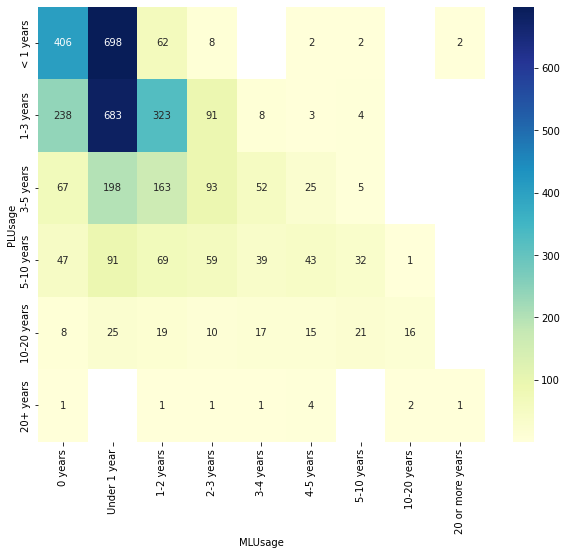

In [3294]:

fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(df_mlpl, annot=True, fmt="g", ax=ax, cmap="YlGnBu")
plt.show()

In [3295]:
df_new[(df_new['Gender']=='Woman') & (df_new['AgeGroup']=='>40')][COLS_USAGE].head()

,Age,Gender,AgeGroup,PL-Count,MLUsage,PLUsage
104,40-44,Woman,>40,1,4-5 years,5-10 years
127,40-44,Woman,>40,2,5-10 years,5-10 years
150,70+,Woman,>40,2,1-2 years,20+ years
175,40-44,Woman,>40,3,0 years,5-10 years
232,55-59,Woman,>40,1,Under 1 year,5-10 years


In [3296]:
COLS_SAL = ('Q25', 'What is your current yearly compensation (approximate $USD)?')
df[COLS_SAL].value_counts(normalize=True).sort_values(ascending=False)

$0-999              0.218894
1,000-1,999         0.062959
10,000-14,999       0.061724
30,000-39,999       0.048145
100,000-124,999     0.047105
5,000-7,499         0.045416
50,000-59,999       0.045286
40,000-49,999       0.044701
20,000-24,999       0.038139
2,000-2,999         0.037359
15,000-19,999       0.037230
7,500-9,999         0.035865
60,000-69,999       0.035800
25,000-29,999       0.030537
70,000-79,999       0.030147
4,000-4,999         0.029628
150,000-199,999     0.025469
80,000-89,999       0.025404
3,000-3,999         0.024690
125,000-149,999     0.024625
90,000-99,999       0.022741
200,000-249,999     0.011500
300,000-499,999     0.005913
250,000-299,999     0.004873
>$1,000,000         0.003768
$500,000-999,999    0.002079
Name: (Q25, What is your current yearly compensation (approximate $USD)?), dtype: float64

In [3297]:
COLS_INDUSTRY = ('Q20', 'In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice')
df[COLS_INDUSTRY].value_counts(normalize=True)*100

Computers/Technology                      24.986217
Academics/Education                       19.687596
Accounting/Finance                         8.937213
Other                                      6.958652
Manufacturing/Fabrication                  5.341501
Medical/Pharmaceutical                     4.753446
Government/Public Service                  4.447167
Online Service/Internet-based Services     3.583461
Energy/Mining                              3.418070
Retail/Sales                               3.283308
Insurance/Risk Assessment                  2.597243
Marketing/CRM                              2.284839
Broadcasting/Communications                1.996937
Shipping/Transportation                    1.935681
Non-profit/Service                         1.837672
Online Business/Internet-based Sales       1.684533
Military/Security/Defense                  1.206738
Hospitality/Entertainment/Sports           1.059724
Name: (Q20, In what industry is your current employer/contract (

In [3298]:
COLS_EDU = ('Q4', 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?')
df[COLS_EDU].value_counts(normalize=True)*100

Master’s degree                                                      39.009741
Bachelor’s degree                                                    38.143457
Doctoral degree                                                      10.761175
Some college/university study without earning a bachelor’s degree     6.680014
I prefer not to answer                                                2.414045
No formal education past high school                                  1.605513
Professional doctorate                                                1.386055
Name: (Q4, What is the highest level of formal education that you have attained or plan to attain within the next 2 years?), dtype: float64

In [3299]:
COLS_ROLE = ('Q5', 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice')
df[COLS_ROLE].value_counts(normalize=True)*100

Student                         26.196435
Data Scientist                  13.922150
Software Engineer                9.429022
Other                            9.213414
Data Analyst                     8.859200
Currently not employed           7.646402
Research Scientist               5.921534
Machine Learning Engineer        5.771378
Business Analyst                 3.726947
Program/Project Manager          3.268779
Data Engineer                    2.571902
Product Manager                  1.228199
Statistician                     1.205098
DBA/Database Engineer            0.658376
Developer Relations/Advocacy     0.381165
Name: (Q5, Select the title most similar to your current role (or most recent title if retired): - Selected Choice), dtype: float64

### Learn

In [3300]:
COLS_DS_NONE = list(filter(lambda x: True if x[0]=='Q40_Part_11' else False, df.columns.to_list()))
COLS_DS = list(filter(lambda x: True if x[0][:3]=='Q40' and x not in COLS_DS_NONE else False, df.columns.to_list())) # [0][-2:] != '12'
df[COLS_DS].count().sort_values(ascending=False)

Q40_Part_1   On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera                                                                  9649
Q40_Part_3   On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses                                                      8670
Q40_Part_7   On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udemy                                                                     6440
Q40_Part_10  On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - University Courses (resulting in a university degree)                     4882
Q40_Part_4   On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp                                              

In [3301]:
def printCols(cat, cols, cols_top3, cols_other, cols_none):
    print(f"COLS_{cat} {len(cols):2d}", end=': ');               [print(col[0], end=', ') for col in cols]; print()
    print(f"COLS_{cat}_TOP3' {len(cols_top3):2d}", end=': ');     [print(col, end=', ') for col in cols_top3]; print()
    print(f"COLS_{cat}_OTHER' {len(cols_other):2d}", end=': ');   [print(col[0], end=', ') for col in cols_other]; print()
    print(f"COLS_{cat}_NONE' {len(cols_none):2d}", end=': ');     [print(col, end=', ') for col in cols_none]; print()

In [3302]:
# Categorise the list of columns that are top3 and not top3
COLS_DS_TOP3 = ['Q40_Part_1', 'Q40_Part_3','Q40_Part_7']
COLS_DS_OTHER = list(filter(lambda x: True if x[0] not in COLS_DS_TOP3 else False, COLS_DS))
printCols('DS', COLS_DS, COLS_DS_TOP3, COLS_DS_OTHER, COLS_DS_NONE)
df[COLS_DS].head()


COLS_DS 11: Q40_Part_1, Q40_Part_2, Q40_Part_3, Q40_Part_4, Q40_Part_5, Q40_Part_6, Q40_Part_7, Q40_Part_8, Q40_Part_9, Q40_Part_10, Q40_OTHER, 
COLS_DS_TOP3'  3: Q40_Part_1, Q40_Part_3, Q40_Part_7, 
COLS_DS_OTHER'  8: Q40_Part_2, Q40_Part_4, Q40_Part_5, Q40_Part_6, Q40_Part_8, Q40_Part_9, Q40_Part_10, Q40_OTHER, 
COLS_DS_NONE'  1: ('Q40_Part_11', 'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - None'), 


,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_OTHER
,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udacity,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udemy,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - LinkedIn Learning,"On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Cloud-certification programs (direct from AWS, Azure, GCP, or similar)",On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - University Courses (resulting in a university degree),On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Other
0,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN
1,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN
2,NaN,NaN,NaN,DataCamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coursera,edX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,Udemy,NaN,NaN,NaN,NaN


BEFORE 0 16772
AFTER 19400
     Age Gender    Country AgeGroup  PL-Count  Python  R  SQL  PL-None  \
0  50-54    Man      India      >40         2       1  1    0        0   
1  50-54    Man  Indonesia      >40         4       0  0    1        1   
2  22-24    Man   Pakistan      <40         3       1  0    0        0   
3  45-49    Man     Mexico      >40         1       1  0    0        0   
4  45-49    Man      India      >40         3       1  0    0        1   

   PL-Other  ...  HW-None  HW-Other       MLUsage     PLUsage  DS-Count  \
0         0  ...        0         1    5-10 years  5-10 years         6   
1         3  ...        1         0  Under 1 year   20+ years         3   
2         2  ...        0         1       0 years   1-3 years         1   
3         0  ...        0         0    5-10 years   20+ years         2   
4         2  ...        1         0   10-20 years   < 1 years         2   

   DS-Coursera  DS-Kaggle  DS-Udemy  DS-None  DS-Other  
0            1      

,Overall,"(<40, Woman)","(>40, Woman)"
Count,100.00,15.97,2.86
DS-Coursera,37.15,34.19,39.57
DS-Kaggle,0.00,0.00,0.00
DS-Udemy,24.79,22.26,24.63
DS-Other,10.80,10.65,11.83
DS-None,6.78,4.53,5.92


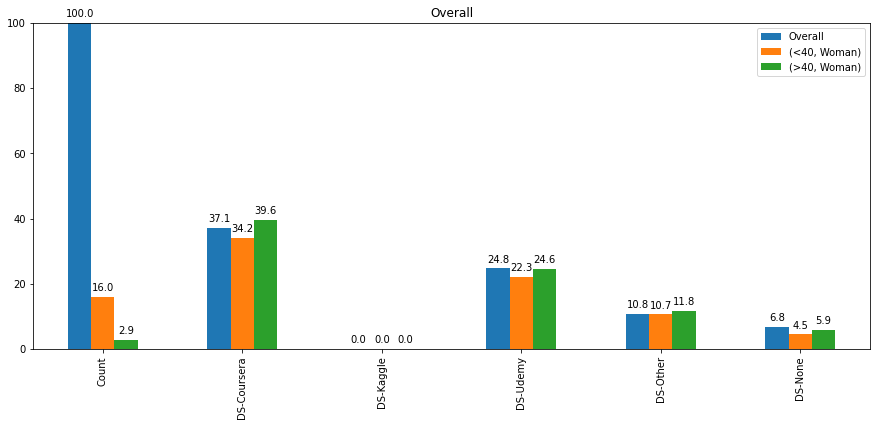

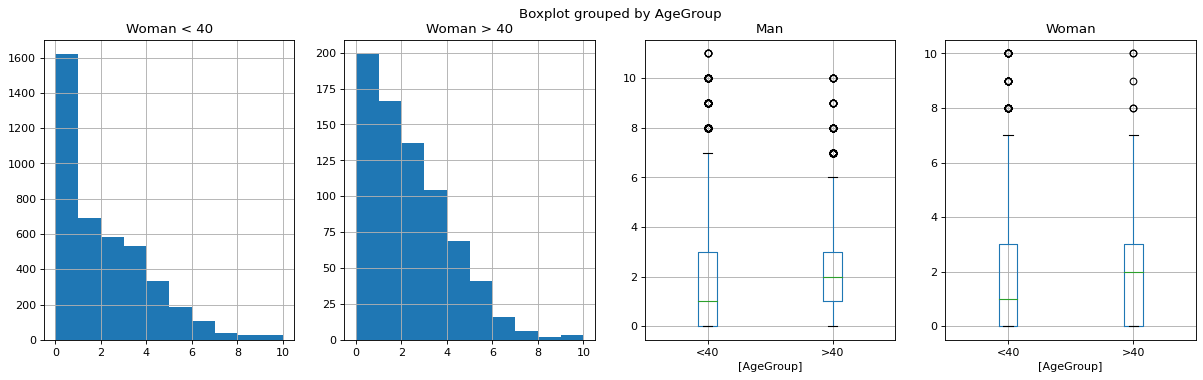

In [3303]:
summarise(df, df_new, 'DS', COLS_DS, COLS_DS_OTHER, 
            'Q40_Part_1', 'DS-Coursera', "Coursera",
            'Q40_Part_3', 'DS-Kaggle', "Kaggle",
            'Q40_Part_7', 'DS-Udemy', "Udemy", 
            'Q40_Part_11')

In [3322]:
df_new['DS-Count'].median()

1.0